In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read Training Data

dataTrain = pd.read_csv('/content/laptop_price.csv', encoding='latin-1')

dataTrain.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [4]:
# The shape displays the number of rows and columns in the training set

dataTrain.shape

(1303, 12)

In [5]:
 #to know the column names
dataTrain.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [6]:
# Removing Ros With Null Values
dataTrain=dataTrain.dropna()

In [7]:
# check If  null values are Elimination
dataTrain.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [8]:
dataTrain.shape

(1303, 12)

In [9]:
# Checking the data types to see if all the data is in correct format
dataTrain.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,int64
Memory,object
Gpu,object
OpSys,object


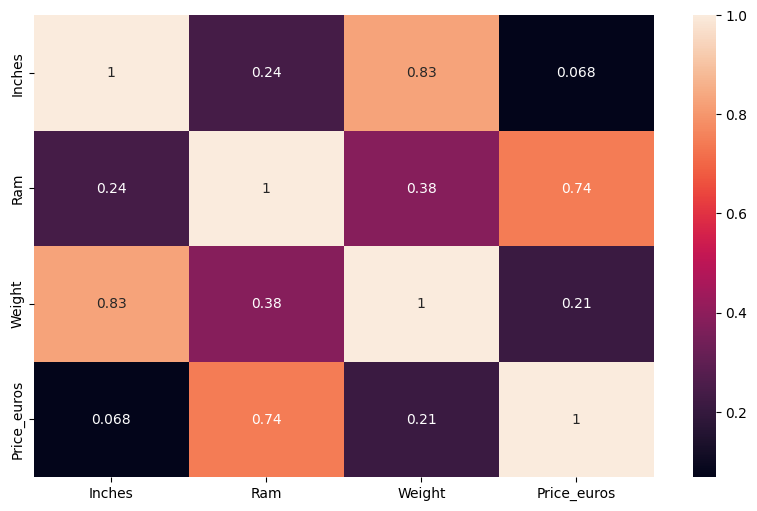

In [10]:
 # relationship between the target variable and the features,
 # in addition to correlation coefficient and p-value.

 # heatmap

plt.figure(figsize=(10,6))
numerical_features = dataTrain.select_dtypes(include=['number']).columns
corr = dataTrain[numerical_features].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
# Regression plot

<Axes: xlabel='Inches', ylabel='Price_euros'>

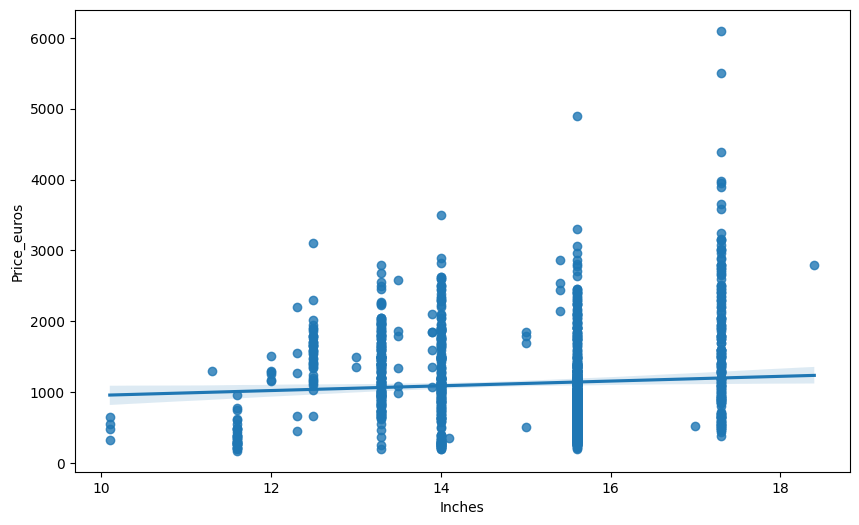

In [12]:
# This regression plot show the relation between Inches and price_euros.

plt.figure(figsize=(10,6))
sns.regplot(x="Inches", y="Price_euros", data=dataTrain)

In [13]:
# Pearson Correlation Coefficient  with a P-value

from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Inches'], dataTrain['Price_euros'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.06819666592963931  with a P-value of P = 0.013808550905012583


<Axes: xlabel='Ram', ylabel='Price_euros'>

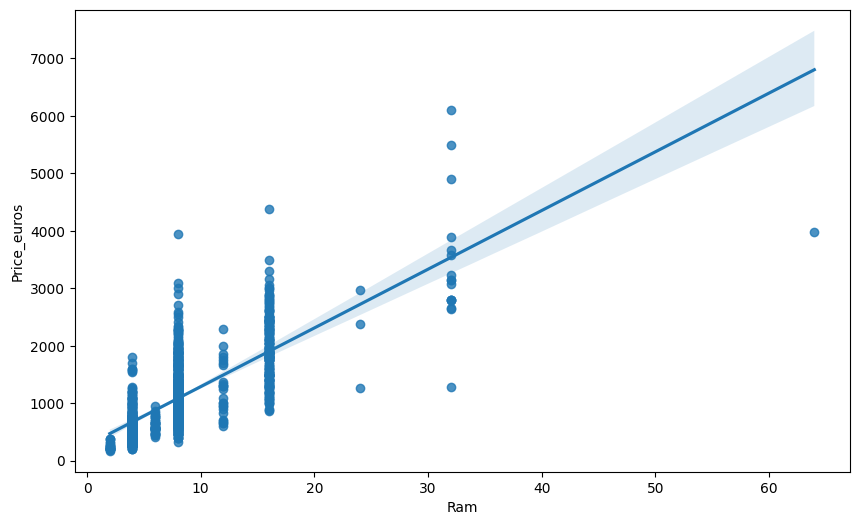

In [14]:
# This regression plot show the relation between Ram and price_euros.

plt.figure(figsize=(10,6))
sns.regplot(x="Ram", y="Price_euros", data=dataTrain)

In [21]:
# Pearson Correlation Coefficient  with a P-value
pearson_coef, p_value = stats.pearsonr(dataTrain['Ram'], dataTrain['Price_euros'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7430071352506948  with a P-value of P = 3.910343561985347e-229


<Axes: xlabel='Weight', ylabel='Price_euros'>

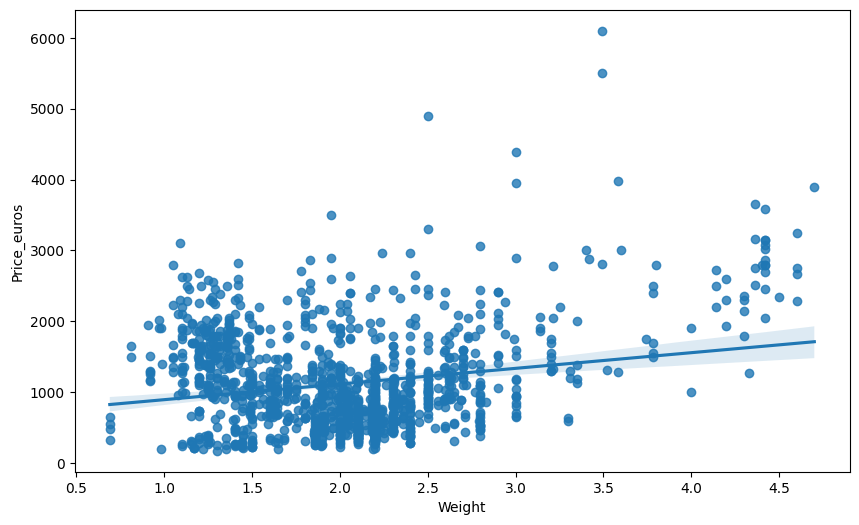

In [22]:
# This regression plot show the relation between Weight and price_euros.

plt.figure(figsize=(10,6))
sns.regplot(x="Weight", y="Price_euros", data=dataTrain)

In [23]:
# Pearson Correlation Coefficient  with a P-value
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Weight'], dataTrain['Price_euros'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.21036979891687174  with a P-value of P = 1.687222341888722e-14


In [ ]:
# These plots are  categorical data of features for prediction.

<Axes: xlabel='Company', ylabel='Price_euros'>

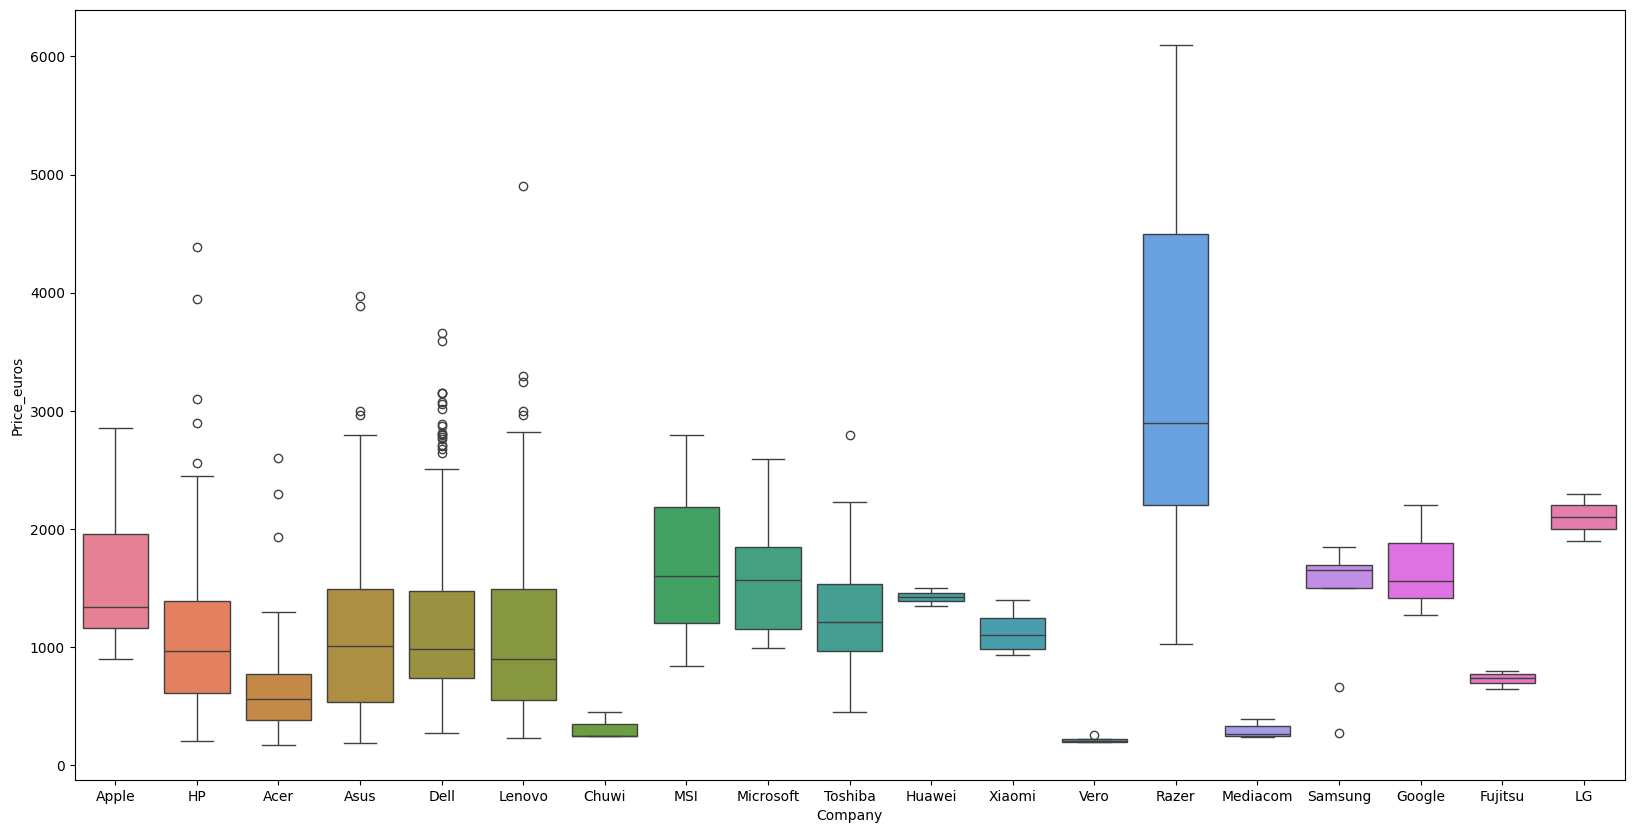

In [24]:
#The box plot shows how prices vary based on different company.
plt.figure(figsize=(20,10))
sns.boxplot(x="Company", y="Price_euros", data=dataTrain, palette="husl")

<Axes: xlabel='Product', ylabel='Price_euros'>

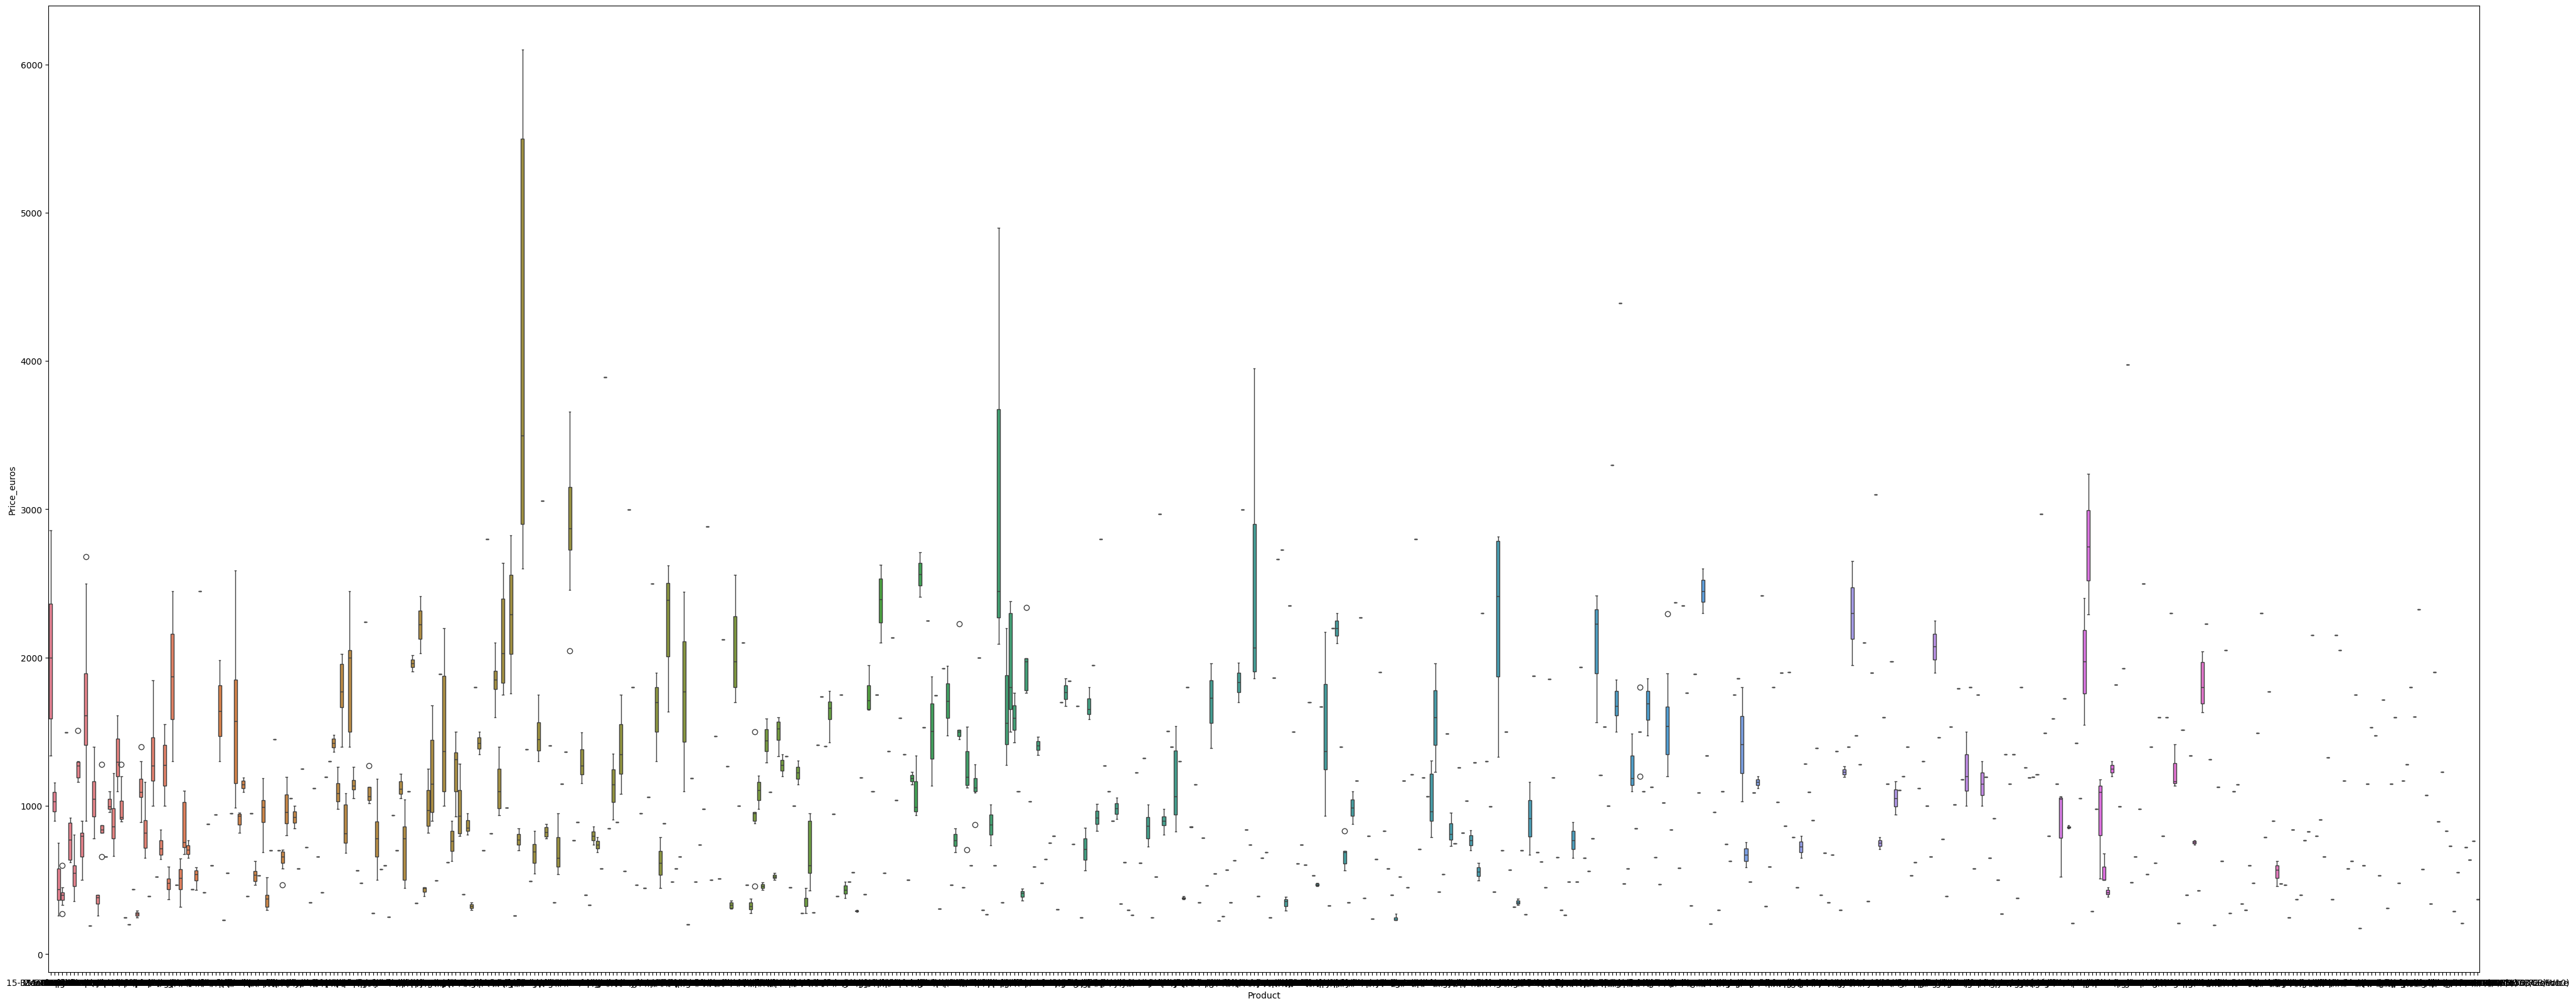

In [25]:
#The box plot shows how prices vary based on product.
plt.figure(figsize=(50,20))
sns.boxplot(x="Product", y="Price_euros", data=dataTrain, palette="husl")


<Axes: xlabel='TypeName', ylabel='Price_euros'>

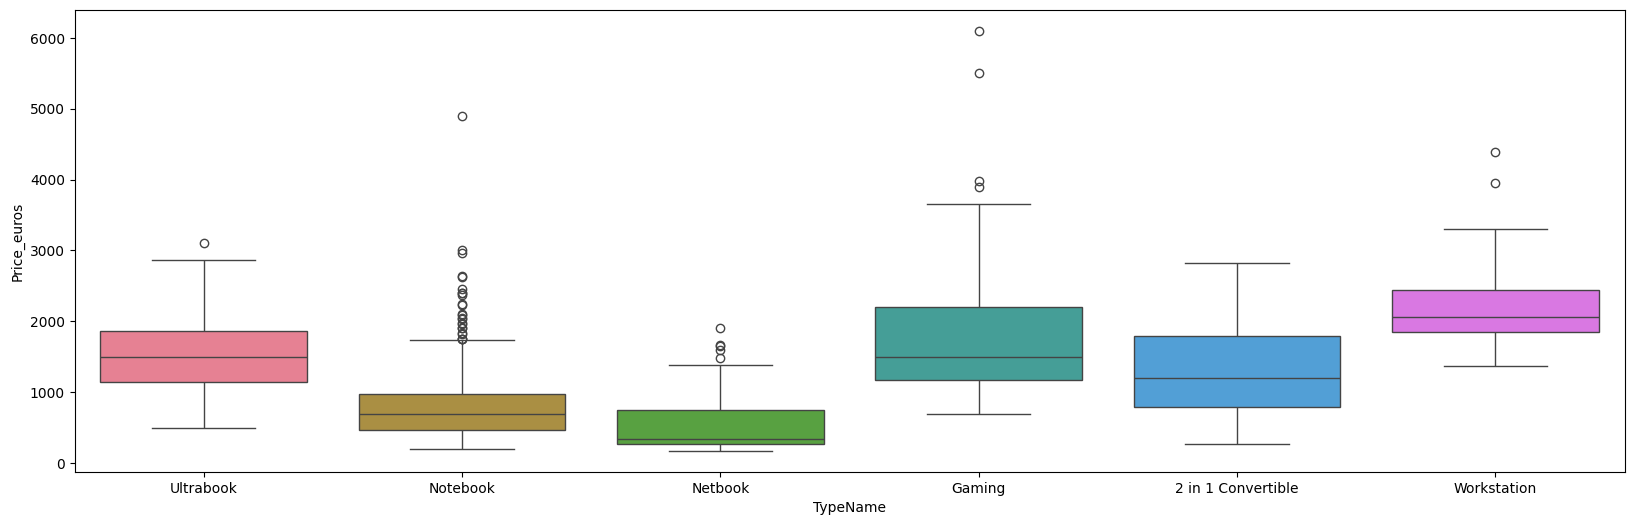

In [26]:
#The box plot shows how prices vary based on Typename.
plt.figure(figsize=(20,6))
sns.boxplot(x="TypeName", y="Price_euros", data=dataTrain, palette="husl")

<Axes: xlabel='ScreenResolution', ylabel='Price_euros'>

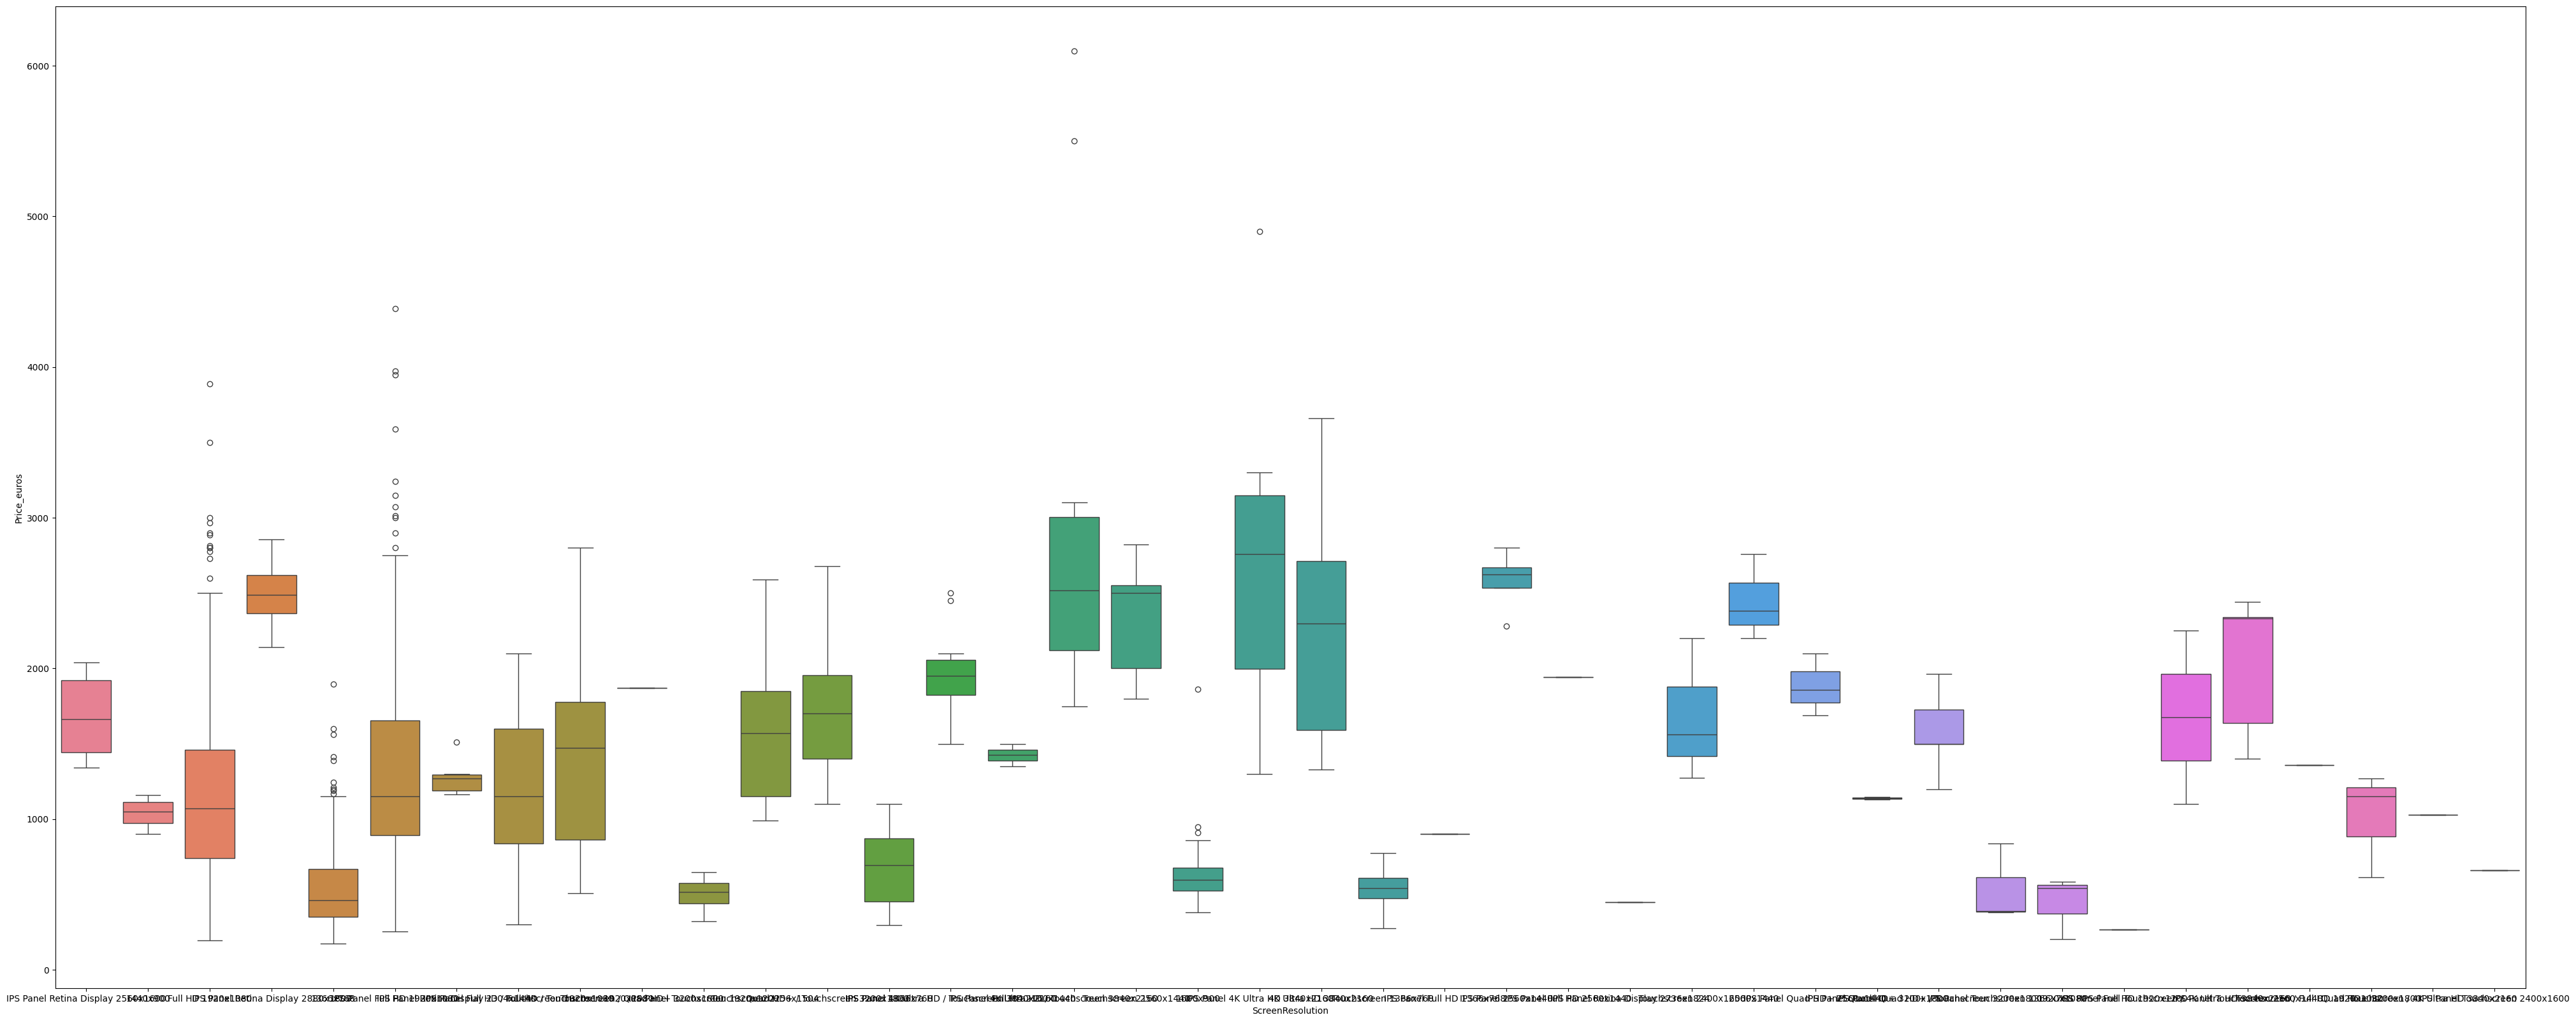

In [27]:
#The box plot shows how prices vary based on ScreenResolution.
plt.figure(figsize=(50,20))
sns.boxplot(x="ScreenResolution", y="Price_euros", data=dataTrain, palette="husl")

<Axes: xlabel='Cpu', ylabel='Price_euros'>

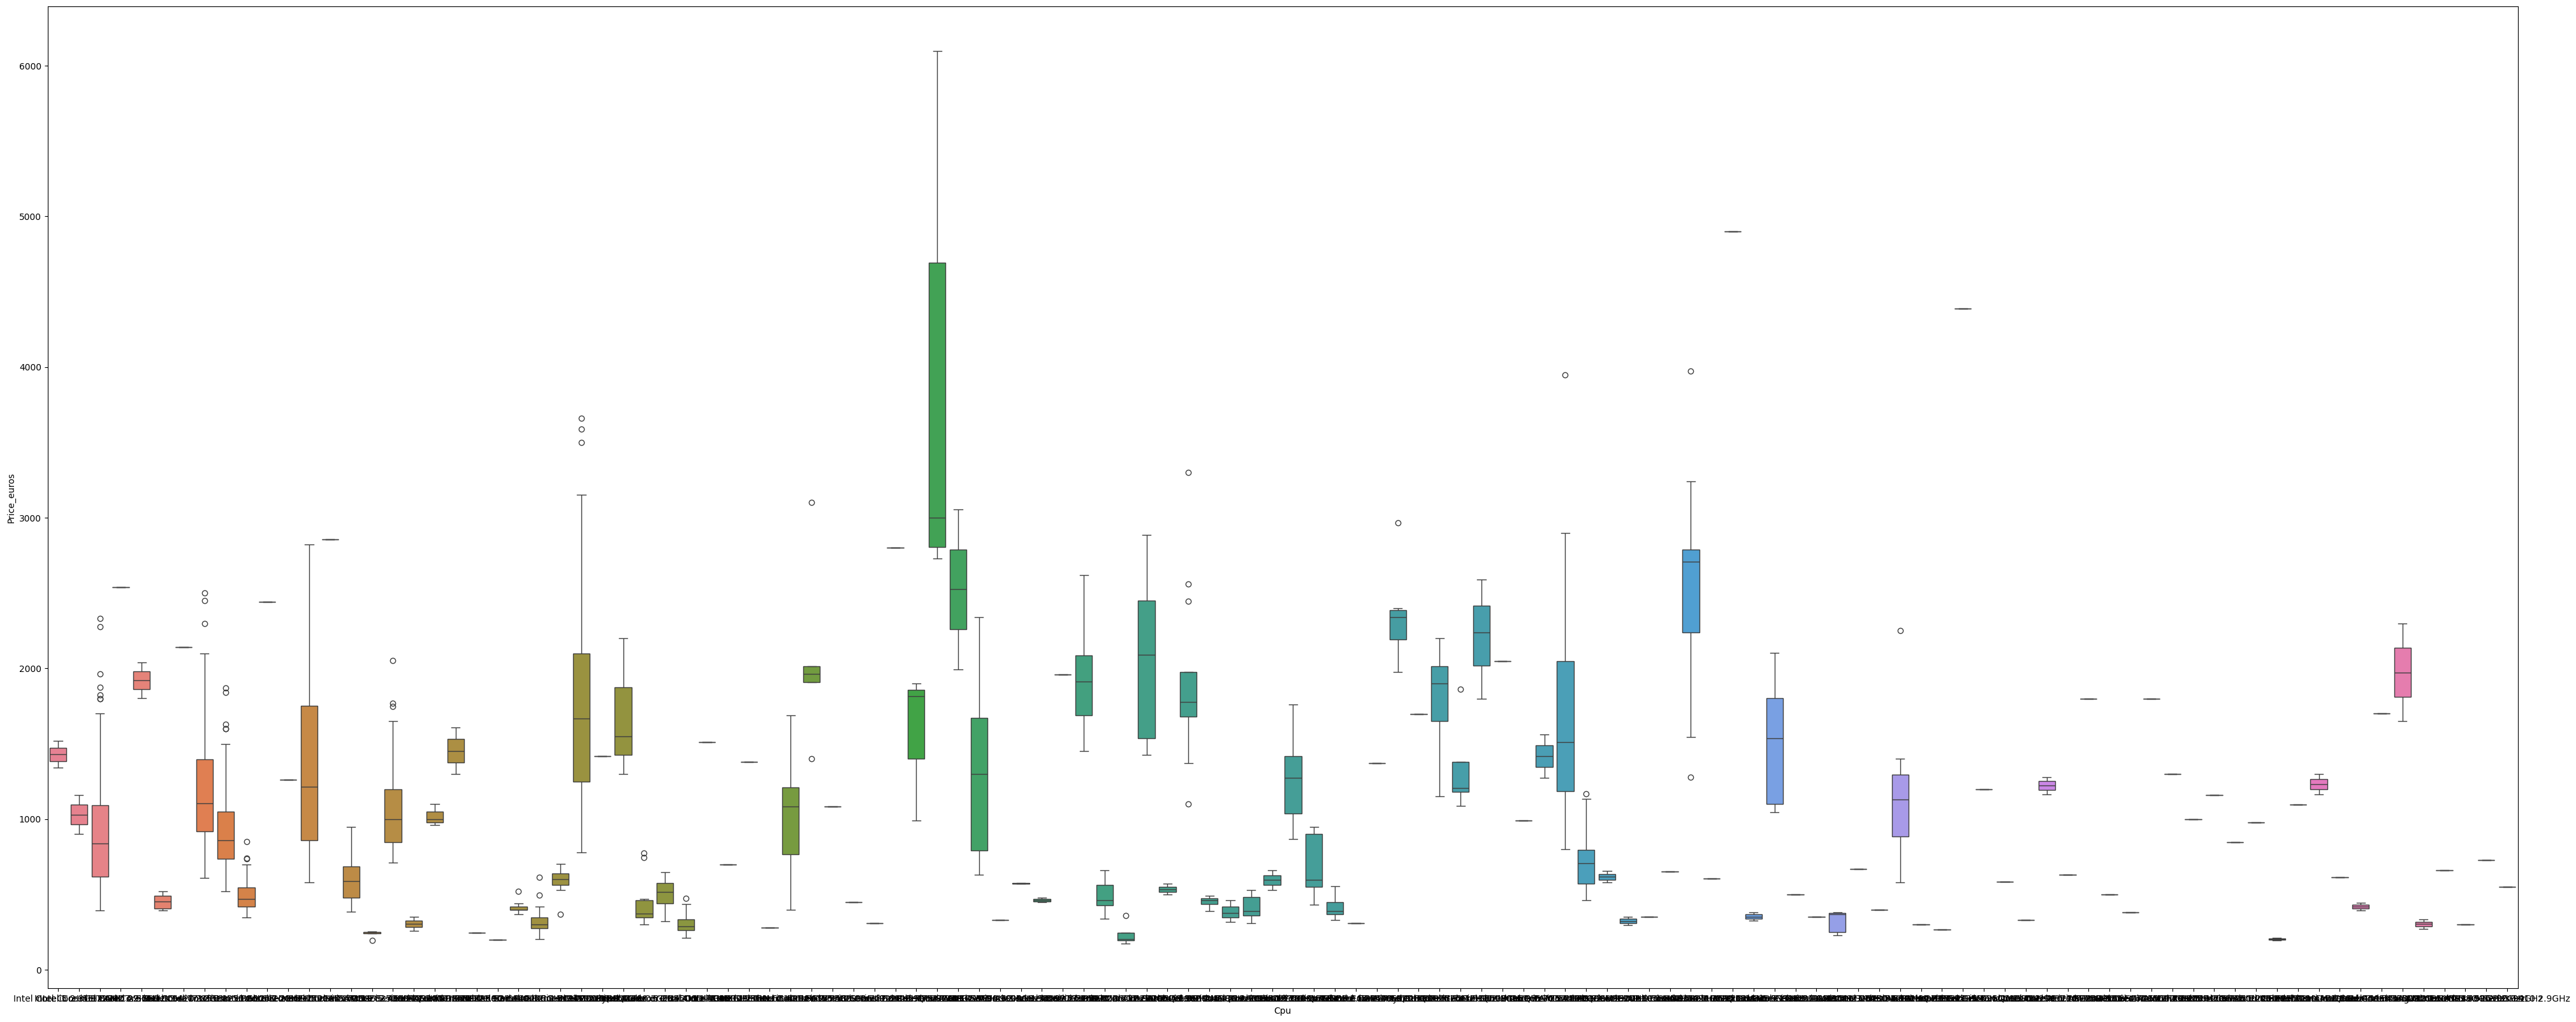

In [28]:
#The box plot shows how prices vary based on Cpu.
plt.figure(figsize=(50,20))
sns.boxplot(x="Cpu", y="Price_euros", data=dataTrain, palette="husl")

<Axes: xlabel='Memory', ylabel='Price_euros'>

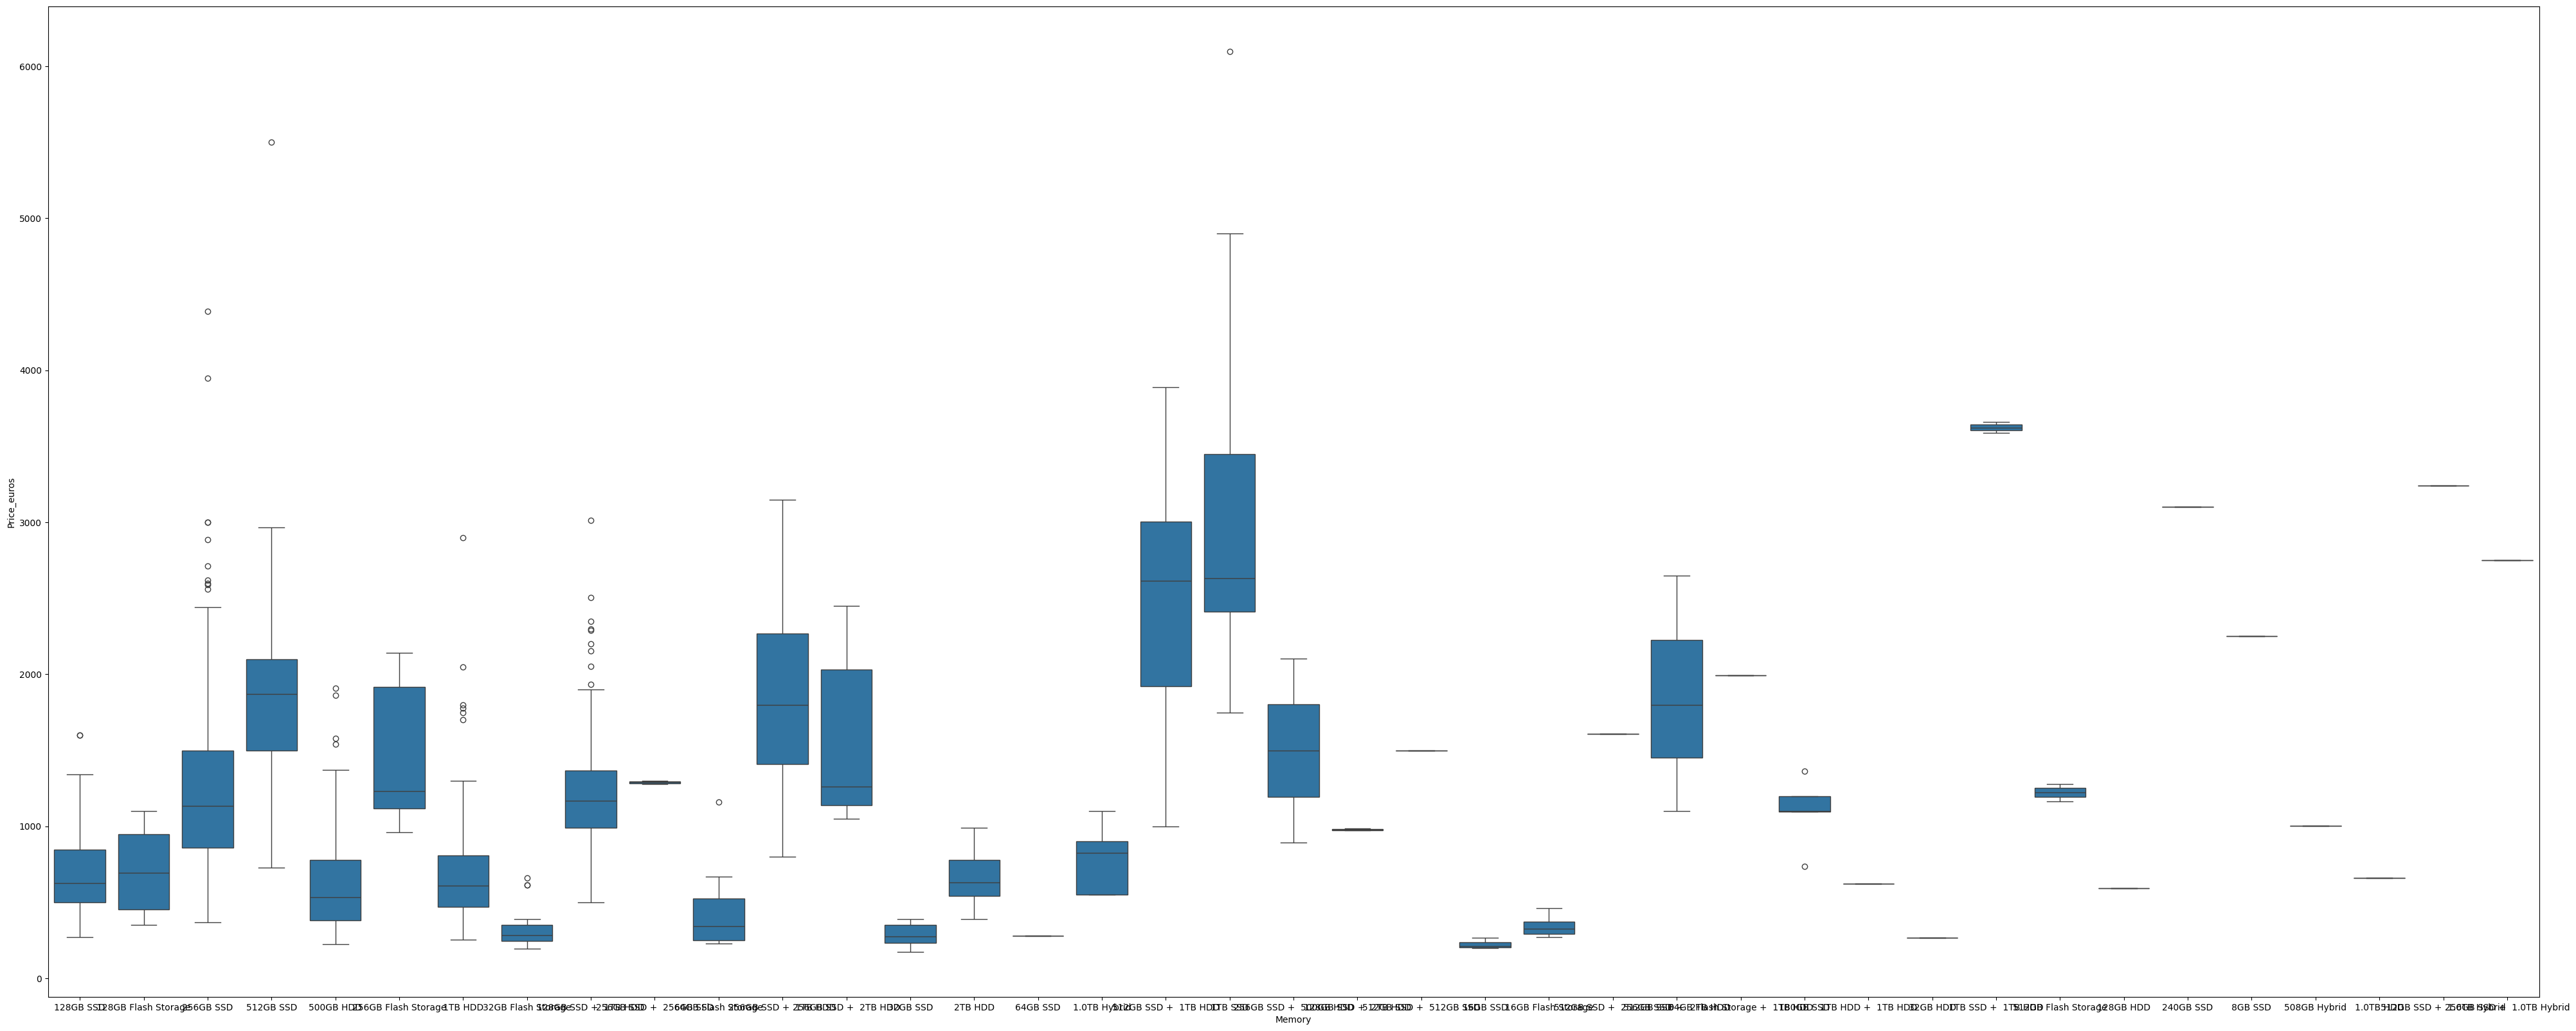

In [29]:
#The box plot shows how prices vary based on Memory.
plt.figure(figsize=(50,20))
sns.boxplot(x="Memory", y="Price_euros", data=dataTrain)

<Axes: xlabel='Gpu', ylabel='Price_euros'>

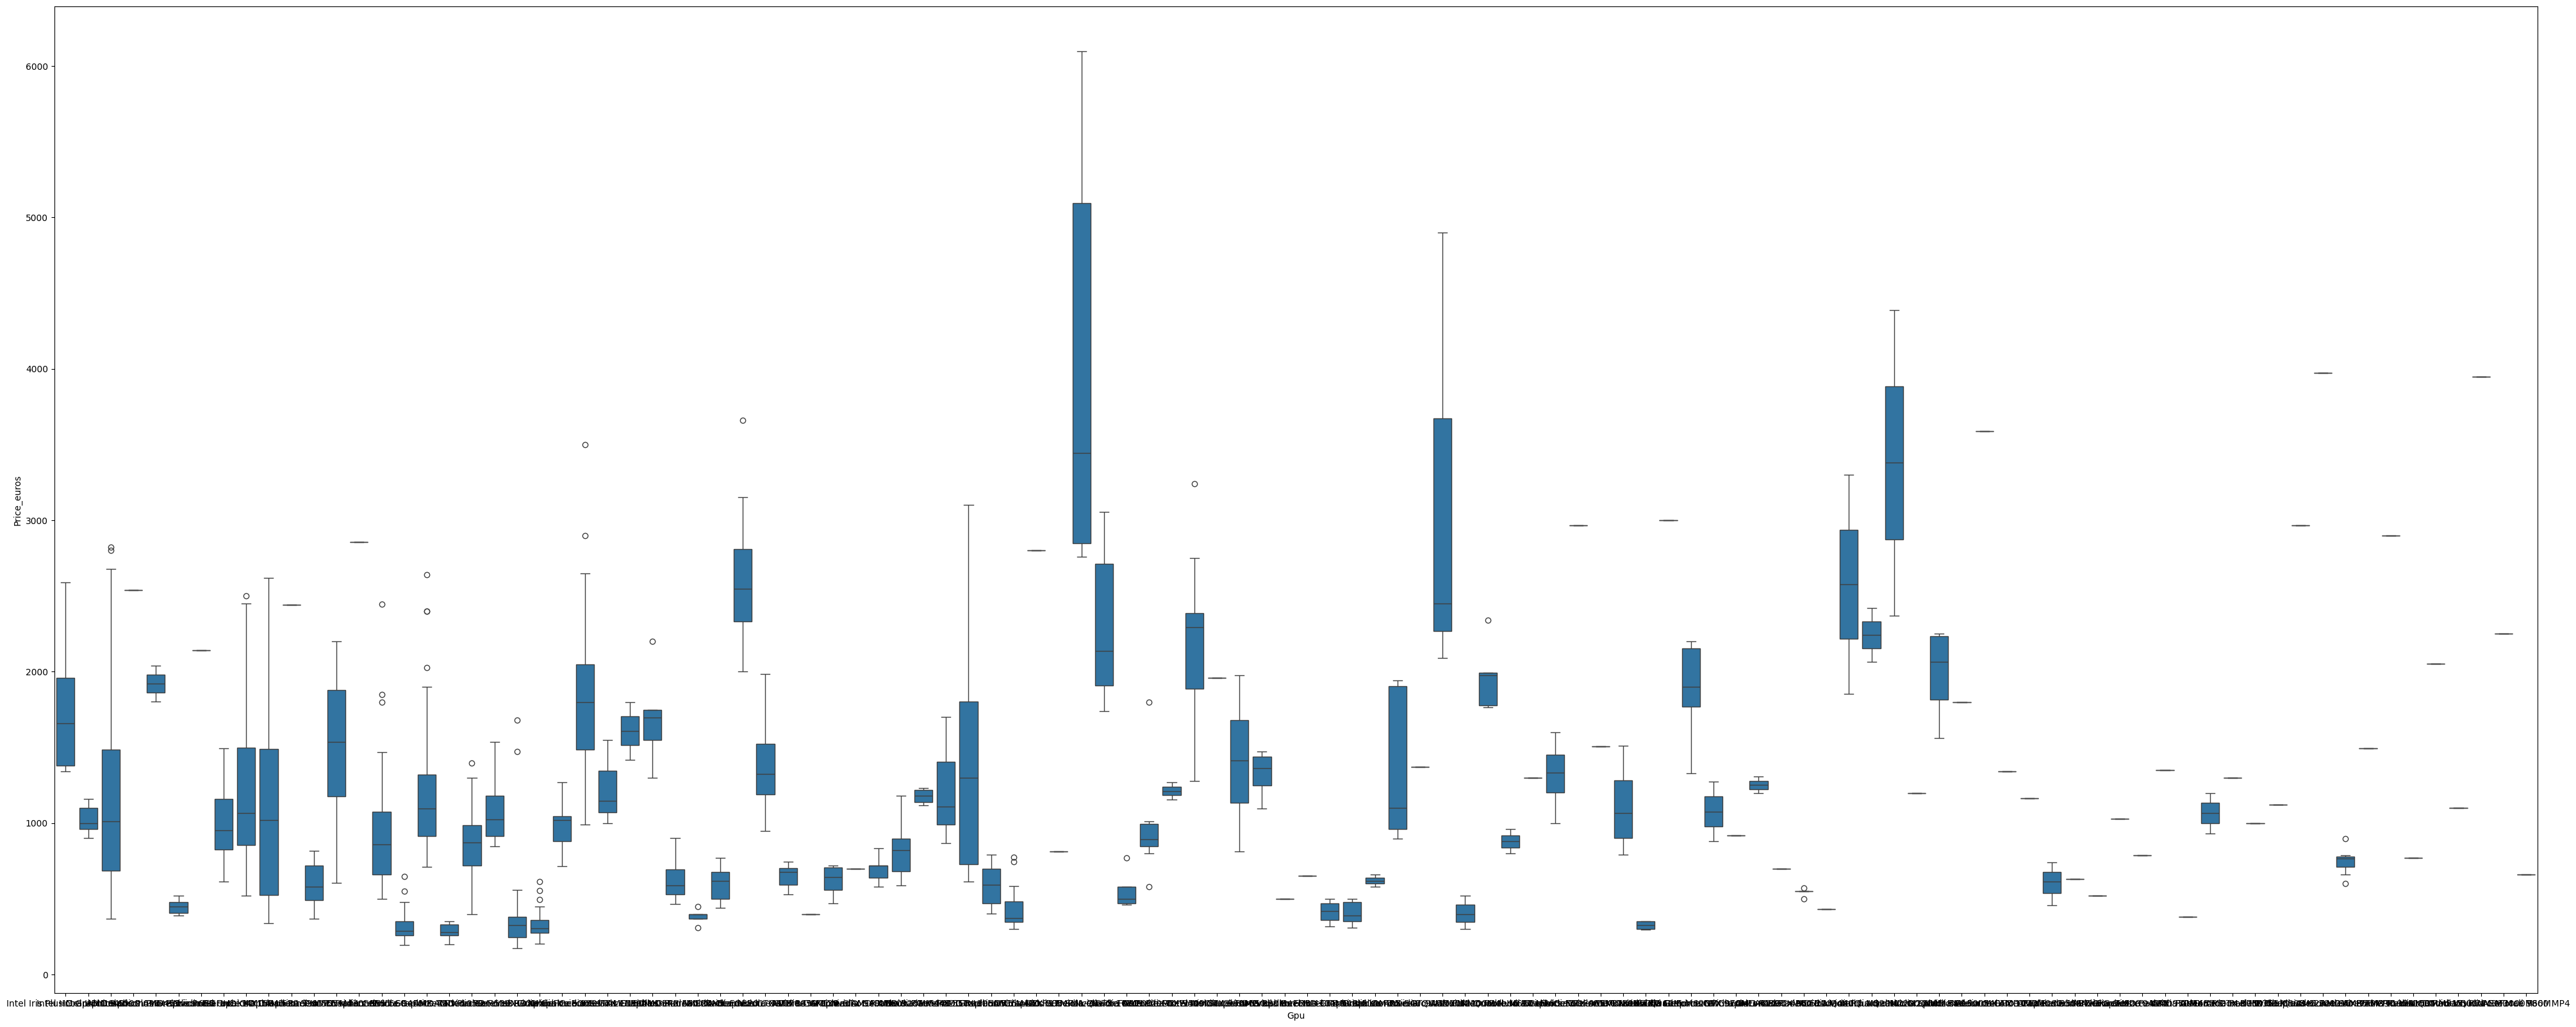

In [30]:
#The box plot shows how prices vary based on Gpu.
plt.figure(figsize=(50,20))
sns.boxplot(x="Gpu", y="Price_euros", data=dataTrain)

<Axes: xlabel='OpSys', ylabel='Price_euros'>

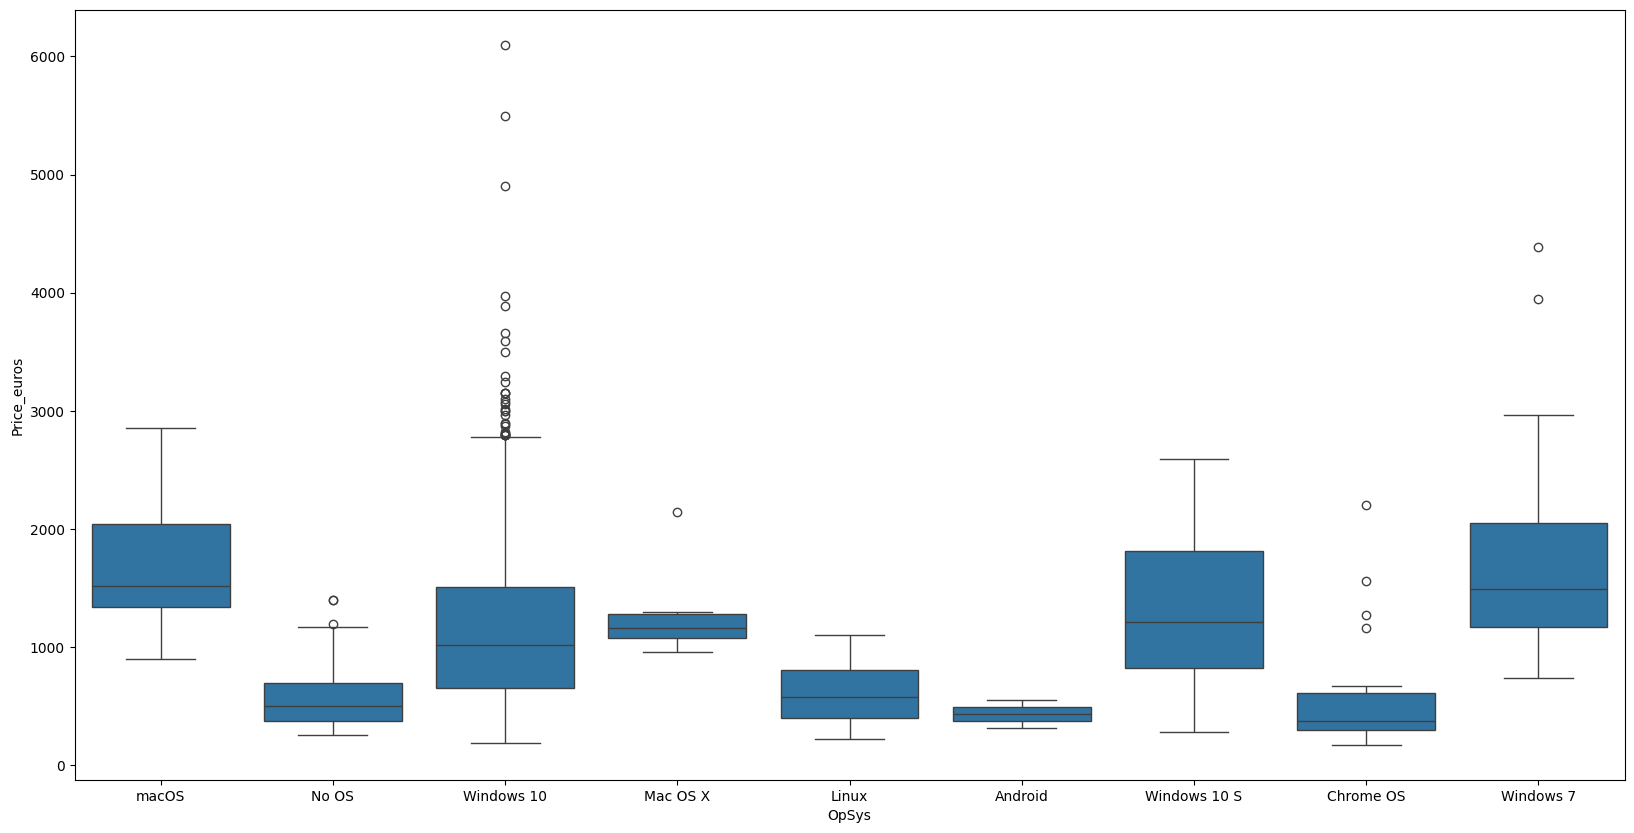

In [31]:
##The box plot shows how prices vary based on OpSys.
plt.figure(figsize=(20,10))
sns.boxplot(x="OpSys", y="Price_euros", data=dataTrain)

In [15]:
# Dropped some features because they had no impact on price prediction.
dataTrain.drop(['Inches'], axis = 1, inplace = True)

In [33]:
column_names = dataTrain.columns.tolist()
column_names

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Price_euros']

In [16]:
feature_column_names = dataTrain.drop(['Price_euros'], axis = 1).columns.tolist()
feature_column_names

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

In [17]:
dataTrain.shape

(1303, 11)

In [ ]:
# data cleaning method to clean the data

In [36]:
# A decriptive analysis to check in incorrect entries and anormalies
dataTrain.describe()

,Ram,Price_euros
count,1303.000000,1303.000000
mean,8.382195,1123.686992
std,5.084665,699.009043
min,2.000000,174.000000
25%,4.000000,599.000000
50%,8.000000,977.000000
75%,8.000000,1487.880000
max,64.000000,6099.000000


In [102]:
import scipy.stats as stats
import numpy as np
import pandas as pd



# Select only numerical features for z-score calculation
numerical_features = dataTrain.select_dtypes(include=[np.number]).columns
dataTrain_numerical = dataTrain[numerical_features]

# Apply z-score transformation to numerical features
dataTrain_numerical = pd.DataFrame(stats.zscore(dataTrain_numerical), columns=numerical_features, index=dataTrain.index) #Applying zscore to only numerical columns

# Update original DataFrame with z-score transformed numerical features
dataTrain[numerical_features] = dataTrain_numerical[numerical_features]

dataTrain[numerical_features] = dataTrain[numerical_features].clip(-1, 1)

In [104]:
print("Befor Removing Outliers: ")
print(dataTrain.describe())

# Assign dataTrain to dataTrain_clean after outlier removal
dataTrain_clean = dataTrain.copy()

print("\nAfter Removing Outliers: ")
print(dataTrain_clean.describe())

Befor Removing Outliers: 
            Inches          Ram       Weight  Price_euros
count  1303.000000  1303.000000  1303.000000  1303.000000
mean      0.025301    -0.132221    -0.066374    -0.104153
std       0.701623     0.634485     0.681836     0.705173
min      -1.000000    -1.000000    -1.000000    -1.000000
25%      -0.713439    -0.862176    -0.809859    -0.750904
50%       0.408772    -0.075195     0.001904    -0.209930
75%       0.408772    -0.075195     0.392752     0.521213
max       1.000000     1.000000     1.000000     1.000000

After Removing Outliers: 
            Inches          Ram       Weight  Price_euros
count  1303.000000  1303.000000  1303.000000  1303.000000
mean      0.025301    -0.132221    -0.066374    -0.104153
std       0.701623     0.634485     0.681836     0.705173
min      -1.000000    -1.000000    -1.000000    -1.000000
25%      -0.713439    -0.862176    -0.809859    -0.750904
50%       0.408772    -0.075195     0.001904    -0.209930
75%       0.408772 

In [106]:
dataTrain.shape

(1303, 12)

In [107]:
# This is a ckeck for categorical data
dataTrain.describe(include=['object'])

,Company,Product,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys
count,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,39,110,9
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows 10
freq,297,30,727,507,190,412,281,1072


In [112]:
 # Data Transformation
 # Label encoding of categorical features in the training set.
# Label encoding is converting categorical data into numerical data since the model cant understand textual data.

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

dataTrain['Company'] = labelencoder.fit_transform(dataTrain['Company'])
# Change other column names accordingly
dataTrain['TypeName'] = labelencoder.fit_transform(dataTrain['TypeName'])
dataTrain['Product'] = labelencoder.fit_transform(dataTrain['Product'])
dataTrain['ScreenResolution'] = labelencoder.fit_transform(dataTrain['ScreenResolution'])
dataTrain['Cpu'] = labelencoder.fit_transform(dataTrain['Cpu'])
dataTrain['Memory'] = labelencoder.fit_transform(dataTrain['Memory'])
dataTrain['Gpu'] = labelencoder.fit_transform(dataTrain['Gpu'])
dataTrain['OpSys'] = labelencoder.fit_transform(dataTrain['OpSys'])



In [113]:
dataTrain.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,-1.000000,23,65,-0.075195,4,58,8,-1.000000,0.309132
1,1,301,4,-1.000000,1,63,-0.075195,2,51,8,-1.000000,-0.321646
2,7,50,3,0.408772,8,74,-0.075195,16,53,4,-0.268684,-0.785251
3,1,300,4,0.268495,25,85,1.000000,29,9,8,-0.313782,1.000000
4,1,300,4,-1.000000,23,67,-0.075195,16,59,8,-1.000000,0.973055
5,0,58,3,0.408772,0,14,-0.862176,26,17,5,0.092099,-1.000000
6,1,300,4,0.268495,25,84,1.000000,15,60,3,0.001904,1.000000
7,1,301,4,-1.000000,1,63,-0.075195,15,51,8,-1.000000,0.050109
8,2,608,4,-0.713439,8,106,1.000000,29,98,5,-1.000000,0.531403
9,0,430,4,-0.713439,15,83,-0.075195,16,61,5,-0.659533,-0.506178


In [39]:
#values before data transformation
x_train_actual=dataTrain.iloc[:,0:11]
# Access the 'Price_euros' column by name instead of index.
y_train_actual=dataTrain['Price_euros']

In [40]:
import scipy.stats as stats
import numpy as np
import pandas as pd

# Data Transformartion (Normalization)

# Select only numerical features for z-score calculation
numerical_features = dataTrain.select_dtypes(include=[np.number]).columns
dataTrain_numerical = dataTrain[numerical_features]

# Apply z-score transformation to numerical features
dataTrain_numerical = pd.DataFrame(stats.zscore(dataTrain_numerical), columns=numerical_features, index=dataTrain.index) #Applying zscore to only numerical columns

# Update original DataFrame with z-score transformed numerical features
dataTrain[numerical_features] = dataTrain_numerical[numerical_features]

In [41]:
dataTrain

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,-1.333189,MacBook Pro,1.138779,1.747762,-0.475914,-0.075195,-1.542166,0.153493,3.083616,0.309132
1,-1.333189,Macbook Air,1.138779,-1.043399,-0.555339,-0.075195,-1.792003,-0.170358,3.083616,-0.321646
2,0.136477,250 G6,0.335406,-0.155303,-0.118498,-0.075195,-0.043142,-0.077829,-0.781657,-0.785251
3,-1.333189,MacBook Pro,1.138779,2.001504,0.318342,1.498767,1.580802,-2.113462,3.083616,2.023301
4,-1.333189,MacBook Pro,1.138779,1.747762,-0.396488,-0.075195,-0.043142,0.199757,3.083616,0.973055
...,...,...,...,...,...,...,...,...,...,...
1298,0.871310,Yoga 500-14ISK,-2.074710,0.479052,0.477194,-0.862176,-1.542166,-0.355416,0.184661,-0.695089
1299,0.871310,Yoga 900-13ISK,-2.074710,1.240278,0.477194,1.498767,1.580802,-0.355416,0.184661,0.537128
1300,0.871310,IdeaPad 100S-14IBR,0.335406,-1.170270,-1.707010,-1.255667,2.330314,-0.679266,0.184661,-1.280428
1301,0.136477,15-AC110nv (i7-6500U/6GB/1TB/Radeon,0.335406,-1.170270,0.477194,-0.468686,-0.792654,-1.558290,0.184661,-0.514765


In [42]:
dataTrain[numerical_features] = dataTrain[numerical_features].clip(-1, 1)

In [43]:
x_train=dataTrain.iloc[:,0:11]
# Access 'Price_euros' column by name
y_train=dataTrain['Price_euros']

In [108]:
x_train_actual.head()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,1,MacBook Pro,4,23,65,8,4,58,8,1339.69
1,1,Macbook Air,4,1,63,8,2,51,8,898.94
2,7,250 G6,3,8,74,8,16,53,4,575.00
3,1,MacBook Pro,4,25,85,16,29,9,8,2537.45
4,1,MacBook Pro,4,23,67,8,16,59,8,1803.60


In [109]:
y_train_actual.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [ ]:
# Fit Model

In [77]:
from sklearn.model_selection import train_test_split

# split the data into training 70% and testing 30% datasets
x_train, x_test, y_train, y_test = train_test_split(
    dataTrain.iloc[:, 0:11],
    dataTrain.iloc[:, 11],
    test_size=0.2,
    random_state=42
)


In [81]:
#Models
# Multiple Linear Regression
# Calling multiple linear regression model and fitting the training set

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)


In [82]:
# Making price prediction using the testing set (Fit to MLR)
y_pred_MLR = model_mlr.predict(x_test)

In [83]:
#MLR Evaluation
#Calculating the Mean Square Error for MLR model

mse1 = mean_squared_error(y_test, y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  183748.44749079255


In [84]:
#Calculating the Mean Absolute Error for MLR model

mae1= mean_absolute_error(y_test, y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  291.90553332302574


In [85]:
#Random Forest Regressor model
#Calling the random forest model and fitting the training data

rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [86]:
#Prediction of laptop prices using the testing data

y_pred_RF = model_rf.predict(x_test)

In [87]:
#Random Forest Evaluation
#Calculating the Mean Square Error for Random Forest Model (Lowest MSE value)

mse2 = mean_squared_error(y_test, y_pred_RF)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  79146.84411852976


In [88]:
#calculating the Mean Absolute Error for Random Forest Model (Lowest Mean Absolute Error)

mae2= mean_absolute_error(y_test, y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  166.54032944718116


In [89]:
#LASSO Model
#Calling the model and fitting the training data

LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [90]:
#Price prediction uisng testing data

y_pred_LSO = model_lm.predict(x_test)

In [91]:
#LASSO Evaluation (checking another model)
#Mean Absolute Error for LASSO Model

mae3= mean_absolute_error(y_test, y_pred_LSO)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  292.04464290181465


In [92]:
#Mean Squared Error for the LASSO Model

mse3 = mean_squared_error(y_test, y_pred_LSO)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  183833.71913401445


In [93]:
cores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [95]:
mae = pd.DataFrame(data = cores, columns=['Model', 'MAE Score']) # Changed 'scores' to 'cores'
mae

,Model,MAE Score
0,MLR,291.905533
1,Random Forest,166.540329
2,LASSO,292.044643


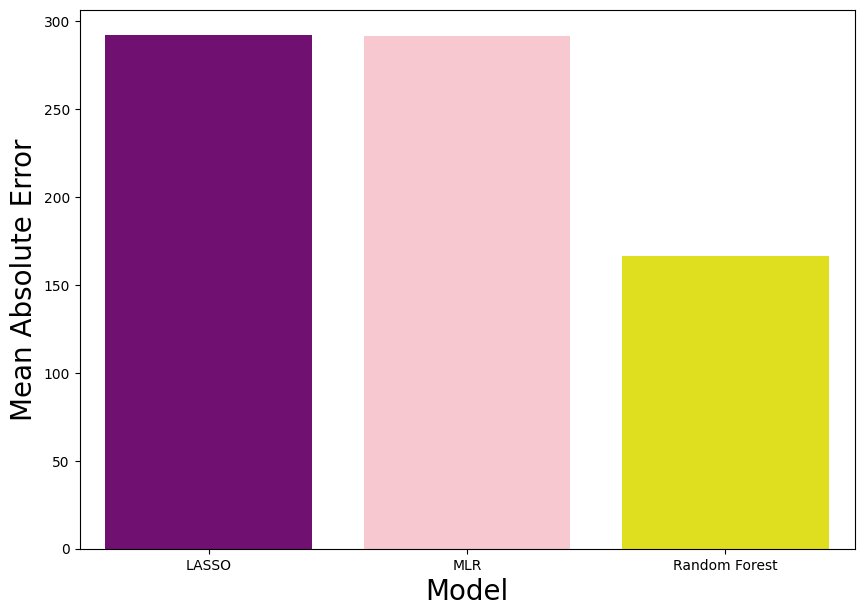

In [98]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))

model_colors = ['purple', 'pink', 'yellow']

sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe, palette=model_colors)

axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()